# Exploratory Data Analysis of the Uscreen Client

# 1. Task Description 

### 1.1. Background

- Uscreen often helps our customers analyze transaction data to help them interpret and act upon insights from the subscriptions that they offer. 
- As a data analyst, you’ll be asked to respond to customer inquiries about this data, build core models and metrics aggregating this data, and provide insights and analysis to customers to help inform their efforts to grow their membership businesses.

### 1.2. Data Description

This dataset represents all successful subscription transactions for one of our customer’s stores covering a one-year period from April 2022 through March 2023.
- invoice_id: unique identifier for the subscription invoice
- user_id: unique identifier for the customer purchasing the subscription. NOTE: one user can have multiple invoices, and can subscribe to different plans
- plan_id: unique identifier for the subscription plan offered by the store
- plan_duration: the length of the purchased subscription period (Monthly or Annual)
- transaction_date: date that the invoice was paid
- subscription_price: initial price (in US dollars ) on the invoice
- discount_applied: the amount (in US dollars) of any discounts or coupons applied to the subscription price
- fees_charged: the amount (in US dollars) charged in fees on the invoice, including but not limited to subscriber fees charged by Uscreen and/or fees charged for payment processing by a third-party vendor such as Stripe
- amount_paid: the amount (in US dollars) that the store receives for the subscription payment. NOTE: use this field when calculating revenue


### 1.3. Research Plan

1. Upload and prepare Data for analysis
2. Make EDA: build reports, calculate metrcis, answer the questions
3. Write suggestions for the client

# 2. Upload and Prepare Data for Analysis

## 2.1. Upload libraries and Data

In [1]:
# libraries 
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# csv file
path = 'uscreen_dataset.csv'
df = pd.read_csv(path, sep = ';')

In [3]:
df.head()

,invoice_id,user_id,plan_id,plan_duration,transaction_date,subscription_price,discount_applied,fees_charged,amount_paid
0,ALNtNdnZ5g,jpvAY4jgqX,3ZksraziGv,Monthly,2022-04-01,"$30,00","$0,00","$1,67","$28,33"
1,UB/p3I3soC,7lnc9S0e+k,3ZksraziGv,Monthly,2022-04-01,"$30,00","$0,00","$1,97","$28,03"
2,JPqaABdS9/,rSRvTF4HKP,3ZksraziGv,Monthly,2022-04-01,"$30,00","$0,00","$1,67","$28,33"
3,qFP1t+jHi2,2P8ziCzzMW,3ZksraziGv,Monthly,2022-04-01,"$30,00","$0,00","$1,67","$28,33"
4,/RBlpp5X7q,i677ChXxOx,3ZksraziGv,Monthly,2022-04-01,"$30,00","$0,00","$1,67","$28,33"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16009 entries, 0 to 16008
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   invoice_id          16007 non-null  object
 1   user_id             16007 non-null  object
 2   plan_id             16007 non-null  object
 3   plan_duration       16007 non-null  object
 4   transaction_date    16007 non-null  object
 5   subscription_price  16007 non-null  object
 6   discount_applied    16007 non-null  object
 7   fees_charged        16007 non-null  object
 8   amount_paid         16007 non-null  object
dtypes: object(9)
memory usage: 1.1+ MB


## 2.2. Data Preprocessing

In [5]:
# change type of the column "date" from string to date 
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [6]:
# change type of the columns "subscription_price", "discount_applied", "fees_charged", "amount_paid"
# from string to float, plus remove symbol $ 

for i in ["subscription_price", "discount_applied", "fees_charged", "amount_paid"]:
    df[i] = df[i].str.replace('$', '').str.replace(',', '.').astype('float')

/var/folders/1w/fxwbqyv52h5bq4v1v80dmd4w0000gn/T/ipykernel_50821/588648042.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[i] = df[i].str.replace('$', '').str.replace(',', '.').astype('float')


In [7]:
# check null values
for i in df.columns:
    print('column', i, 'has', len(df[df[i].isna()]), 'null values')

column invoice_id has 2 null values
column user_id has 2 null values
column plan_id has 2 null values
column plan_duration has 2 null values
column transaction_date has 2 null values
column subscription_price has 2 null values
column discount_applied has 2 null values
column fees_charged has 2 null values
column amount_paid has 2 null values


In [8]:
# check duplicates
df[df.duplicated()]

,invoice_id,user_id,plan_id,plan_duration,transaction_date,subscription_price,discount_applied,fees_charged,amount_paid
16008,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [9]:
df.loc[[16007, 16008]]

,invoice_id,user_id,plan_id,plan_duration,transaction_date,subscription_price,discount_applied,fees_charged,amount_paid
16007,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
16008,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [10]:
# remove 2 null rows, which are also duplicated
df = df.dropna()

In [11]:
# check correct count of plan_id and plan_duration
df.groupby(['plan_duration', 'plan_id']).agg({'plan_duration':'count', 'plan_id':'count'})

,,plan_duration,plan_id
plan_duration,plan_id,,
Annual,4tWDsR5/vb,874,874
Monthly,3ZksraziGv,15133,15133


In [12]:
# check unique and total amoun of the invoices
df['invoice_id'].nunique(), df['invoice_id'].count()

(16007, 16007)

In [13]:
# check unique users and number of purchases
df['user_id'].nunique(), df['user_id'].count()

(3619, 16007)

In [14]:
# check negavite values
for i in ['subscription_price', 'discount_applied', 'fees_charged', 'amount_paid']:
    for j in df[i]:
        if j < 0:
            print(i, j)

fees_charged -30.0
fees_charged -30.0
fees_charged -30.0
fees_charged -30.0
fees_charged -30.0
fees_charged -30.0


In [15]:
# really strange case 
df[df['fees_charged'] == -30.0]

,invoice_id,user_id,plan_id,plan_duration,transaction_date,subscription_price,discount_applied,fees_charged,amount_paid
1140,r9Q0tMnSuT,ajBsM6I0d+,3ZksraziGv,Monthly,2022-04-26,30.0,30.0,-30.0,30.0
2396,Sdvir9fRKe,ajBsM6I0d+,3ZksraziGv,Monthly,2022-05-26,30.0,30.0,-30.0,30.0
5873,lSqH9CWkNE,hnuLNPyskX,3ZksraziGv,Monthly,2022-08-19,30.0,30.0,-30.0,30.0
7145,AKIIMtPKIN,hnuLNPyskX,3ZksraziGv,Monthly,2022-09-19,30.0,30.0,-30.0,30.0
7861,KYCB6cUFNy,206v3oLtiQ,3ZksraziGv,Monthly,2022-10-08,30.0,30.0,-30.0,30.0
9682,Qd0zWhIRGQ,hnuLNPyskX,3ZksraziGv,Monthly,2022-11-19,30.0,30.0,-30.0,30.0


In [16]:
# remove these rows
df = df[df['fees_charged'] != -30.0]

### Stage 2 Summary:
1. We performed preprocessing actions on the data, which involved removing null values, negative fee values, duplicates, changing data types, and removing currency symbols. 

2. It's important for the development and product teams to consider how the null values may have been created in the database, whether by human error, machine malfunction, or a combination of factors. 

3. Similarly, it's crucial to investigate the regular occurrence of negative fees and determine the underlying reason.

# 3. Exploratory Data Analysis

Main Questions:
- What kind of subscriptions does client use? What is the price of subscriptions?
- How are different subscriptions distributed by month?
- How much money does client make from subscriptions?
- What discounts apply? Which subscriptions are most often discounted? What percentage of the subscription cost is the discount?
- Are there users who switched from one subscription to another? monthly to annual, annual to monthly. After how many months?
- What are the applicable fees?

**Q1: What kind of subscriptions does client use? What is the price of subscriptions?**

In [17]:
# check subscription prices
prices = df.groupby(['subscription_price', 'plan_duration']).invoice_id.count().reset_index()
prices = prices.rename(columns = {"invoice_id":"invoice_amount"})
prices

,subscription_price,plan_duration,invoice_amount
0,30.0,Monthly,15127
1,275.0,Annual,874


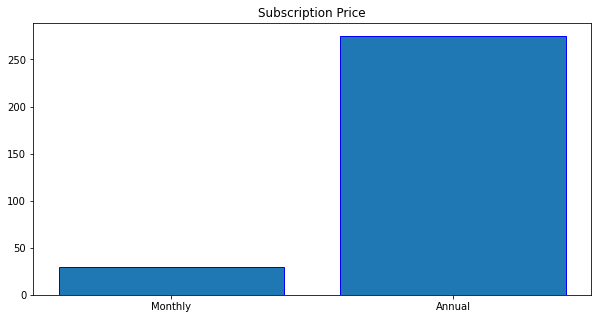

In [18]:
plt.figure(figsize=(10,5))
x = prices['plan_duration']
y = prices['subscription_price']

plt.title('Subscription Price')
plt.bar(x,y,  edgecolor='blue')
plt.show()

In [19]:
annual_sub_profit = prices['subscription_price'][1] / prices['subscription_price'][0]
annual_sub_profit

9.166666666666666

**Q2: How are different subscriptions distributed by month?**

In [20]:
df['transaction_month'] = df['transaction_date'].astype('datetime64[M]')

In [21]:
subs_m = df.pivot_table(index = 'transaction_month',
                        columns = 'plan_duration', 
                        values = 'invoice_id', 
                        aggfunc = 'count').reset_index()

subs_m['total'] = subs_m['Annual'] + subs_m['Monthly']
subs_m

plan_duration,transaction_month,Annual,Monthly,total
0,2022-04-01,26,1274,1300
1,2022-05-01,36,1232,1268
2,2022-06-01,16,1228,1244
3,2022-07-01,25,1234,1259
4,2022-08-01,31,1221,1252
5,2022-09-01,65,1206,1271
6,2022-10-01,49,1182,1231
7,2022-11-01,65,1248,1313
8,2022-12-01,174,1291,1465
9,2023-01-01,265,1325,1590


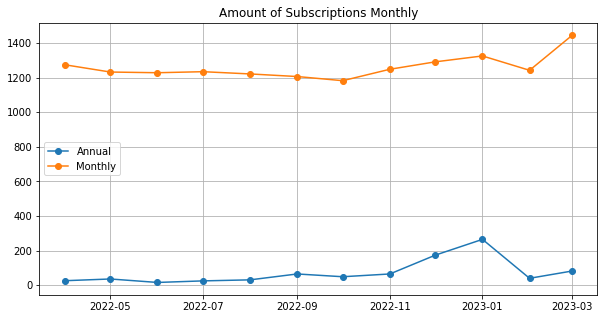

In [22]:
plt.figure(figsize=(10,5))
x = subs_m['transaction_month']
y1 = subs_m['Annual']
y2 = subs_m['Monthly']

plt.title('Amount of Subscriptions Monthly')
plt.plot(x, y1, marker='o', label = 'Annual')
plt.plot(x, y2, marker='o', label = 'Monthly')

plt.legend(loc = 'center left')
plt.grid()
plt.show()

**Q3: How much money does client make from subscriptions?**

In [23]:
# total
df['amount_paid'].sum()

625539.69

In [24]:
# total revenue via Subscription Type
total_rev = df.groupby('plan_duration').amount_paid.sum().reset_index()
total_rev

,plan_duration,amount_paid
0,Annual,203501.66
1,Monthly,422038.03


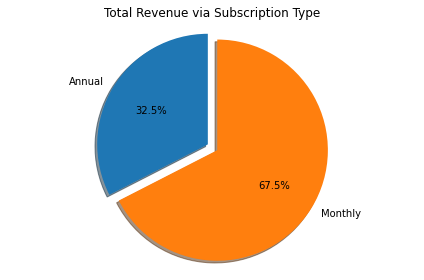

In [25]:
# Pie chart
labels = total_rev['plan_duration']
sizes = total_rev['amount_paid']

explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

ax1.axis('equal') 
plt.title('Total Revenue via Subscription Type')
plt.tight_layout()
plt.show()

In [26]:
# total revenue via Subscription Type & month 
subs_m_rev = df.pivot_table(index = 'transaction_month',
                        columns = 'plan_duration', 
                        values = 'amount_paid', 
                        aggfunc = 'sum').reset_index()

subs_m_rev['total_revenue'] = subs_m_rev['Annual'] + subs_m_rev['Monthly']
subs_m_rev['year_month'] = subs_m_rev['transaction_month'].dt.year.astype(str) + '_' + subs_m_rev['transaction_month'].dt.month.astype(str)
subs_m_rev

plan_duration,transaction_month,Annual,Monthly,total_revenue,year_month
0,2022-04-01,5359.63,35634.02,40993.65,2022_4
1,2022-05-01,7615.12,34154.33,41769.45,2022_5
2,2022-06-01,3493.31,34241.36,37734.67,2022_6
3,2022-07-01,5421.96,34537.60,39959.56,2022_7
4,2022-08-01,6474.97,34227.90,40702.87,2022_8
5,2022-09-01,15026.12,33765.85,48791.97,2022_9
6,2022-10-01,10869.90,33182.37,44052.27,2022_10
7,2022-11-01,14358.84,34941.31,49300.15,2022_11
8,2022-12-01,39280.52,36094.92,75375.44,2022_12
9,2023-01-01,65784.84,37125.32,102910.16,2023_1


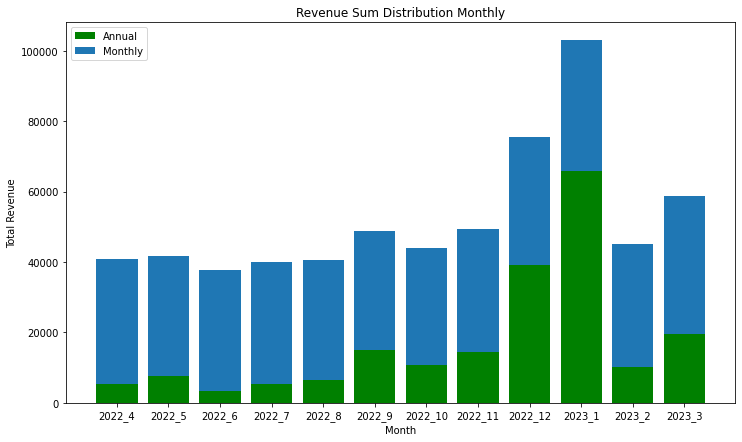

In [27]:
groups = subs_m_rev['year_month']
values1 = subs_m_rev['Annual']
values2 = subs_m_rev['Monthly']

fig, ax = plt.subplots(figsize=(12, 7))
plt.title('Revenue Sum Distribution Monthly')
ax.bar(groups, values1, label = 'Annual', color = 'green')
ax.bar(groups, values2, label = 'Monthly', bottom = values1)

ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue')
plt.legend(loc = 'upper left')
plt.show()

**Q4: What discounts apply? Which subscriptions are most often discounted? What percentage of the subscription cost is the discount?**

In [28]:
df['discount_bigger_zero'] = df['discount_applied'].apply(lambda x: 1 if x > 0 else 0)

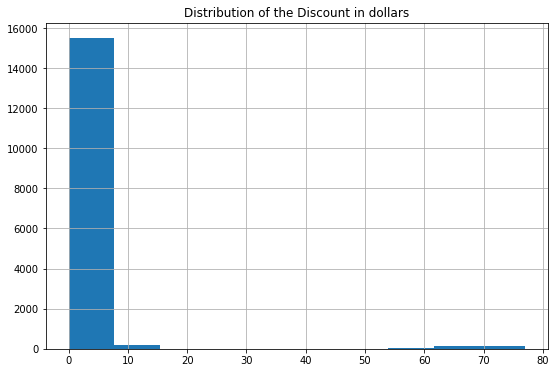

In [29]:
plt.figure(figsize = (9,6))
df['discount_applied'].hist(bins = 10)
plt.title('Distribution of the Discount in dollars')
plt.show()

In [30]:
# what is the perc of subs with discounts?
discounts = (df
                .groupby('plan_duration')
                .agg({'invoice_id':'count', 'discount_bigger_zero':'sum'})
                .reset_index()
            )

discounts = discounts.rename(columns = {"invoice_id":"total_invoices", "discount_bigger_zero":"invoices_with_discount"})
discounts['perc_invoices_with_discount'] = round(discounts['invoices_with_discount'] / discounts['total_invoices'] * 100,2)
discounts

,plan_duration,total_invoices,invoices_with_discount,perc_invoices_with_discount
0,Annual,874,325,37.19
1,Monthly,15127,337,2.23


In [31]:
# what is the perc of subs with discounts in dollars? NEED UPDATE
discounts_sum = (df            
                    .groupby('plan_duration')
                    .agg({'subscription_price':'sum', 'discount_applied':'sum'})
                    .reset_index()
                )

discounts_sum = discounts_sum.rename(columns = {"subscription_price":"sub_total_price", "discount_applied":"sub_total_discounts"})
discounts_sum['perc_of_discounts'] = round(discounts_sum['sub_total_discounts'] / discounts_sum['sub_total_price'] * 100,2)
discounts_sum

,plan_duration,sub_total_price,sub_total_discounts,perc_of_discounts
0,Annual,240350.0,23144.0,9.63
1,Monthly,453810.0,3236.0,0.71


In [32]:
# What months are the most discounted?
df_discounts = (df[(df['discount_bigger_zero'] == 1)]
                    .pivot_table(index = 'transaction_month', 
                                 columns = 'plan_duration', 
                                 values = 'invoice_id', 
                                 aggfunc = 'count').reset_index()
               )

df_discounts

plan_duration,transaction_month,Annual,Monthly
0,2022-04-01,19,10
1,2022-05-01,23,32
2,2022-06-01,9,20
3,2022-07-01,14,16
4,2022-08-01,20,11
5,2022-09-01,23,17
6,2022-10-01,24,8
7,2022-11-01,34,17
8,2022-12-01,86,20
9,2023-01-01,40,24


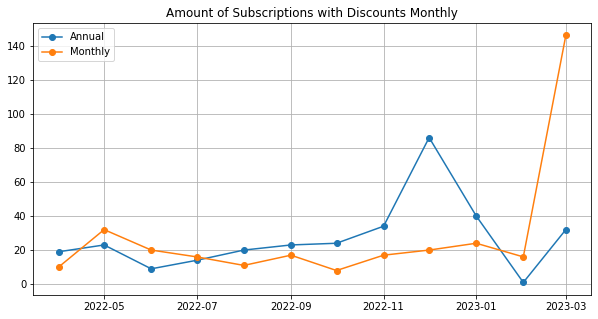

In [33]:
plt.figure(figsize=(10,5))
x = df_discounts['transaction_month']
y1 = df_discounts['Annual']
y2 = df_discounts['Monthly']

plt.title('Amount of Subscriptions with Discounts Monthly')
plt.plot(x, y1, marker='o', label = 'Annual')
plt.plot(x, y2, marker='o', label = 'Monthly')

plt.legend(loc = 'upper left')
plt.grid()
plt.show()

In [34]:
# Popular discounts with Annual Subscription
annual_discounts = df[(df['discount_bigger_zero'] == 1) & (df['plan_duration'] == 'Annual')]['discount_applied'].value_counts().reset_index()
annual_discounts.columns = ['annual_discount_applied_usd', 'amount']
annual_discounts

,annual_discount_applied_usd,amount
0,68.75,148
1,77.00,147
2,55.00,30


In [35]:
# Popular discounts with Monthly Subscription
monthly_discounts = df[(df['discount_bigger_zero'] == 1) & (df['plan_duration'] == 'Monthly')]['discount_applied'].value_counts().reset_index()
monthly_discounts.columns = ['month_discount_applied_usd', 'amount']
monthly_discounts

,month_discount_applied_usd,amount
0,7.5,136
1,10.0,119
2,15.0,65
3,3.0,17


In [36]:
# distribution of monthly subs with discounts
discounts_sum_monthly = (
    df[df['plan_duration'] == 'Monthly']
    .groupby('transaction_month')
    .agg({'invoice_id':'count', 'discount_bigger_zero':'sum'})
    .reset_index()
            )

discounts_sum_monthly = discounts_sum_monthly.rename(columns = {"invoice_id":"sub_total_price", "discount_bigger_zero":"sub_total_discounts"})
discounts_sum_monthly['ratio'] = round(discounts_sum_monthly['sub_total_discounts'] / discounts_sum_monthly['sub_total_price'] * 100,2)
discounts_sum_monthly

,transaction_month,sub_total_price,sub_total_discounts,ratio
0,2022-04-01,1274,10,0.78
1,2022-05-01,1232,32,2.60
2,2022-06-01,1228,20,1.63
3,2022-07-01,1234,16,1.30
4,2022-08-01,1221,11,0.90
5,2022-09-01,1206,17,1.41
6,2022-10-01,1182,8,0.68
7,2022-11-01,1248,17,1.36
8,2022-12-01,1291,20,1.55
9,2023-01-01,1325,24,1.81


In [37]:
# distribution of annual subs with discounts
discounts_sum_annual = (
    df[df['plan_duration'] == 'Annual']
    .groupby('transaction_month')
    .agg({'invoice_id':'count', 'discount_bigger_zero':'sum'})
    .reset_index()
            )

discounts_sum_annual = discounts_sum_annual.rename(columns = {"invoice_id":"sub_total_price", "discount_bigger_zero":"sub_total_discounts"})
discounts_sum_annual['ratio'] = round(discounts_sum_annual['sub_total_discounts'] / discounts_sum_annual['sub_total_price'] * 100,2)
discounts_sum_annual

,transaction_month,sub_total_price,sub_total_discounts,ratio
0,2022-04-01,26,19,73.08
1,2022-05-01,36,23,63.89
2,2022-06-01,16,9,56.25
3,2022-07-01,25,14,56.00
4,2022-08-01,31,20,64.52
5,2022-09-01,65,23,35.38
6,2022-10-01,49,24,48.98
7,2022-11-01,65,34,52.31
8,2022-12-01,174,86,49.43
9,2023-01-01,265,40,15.09


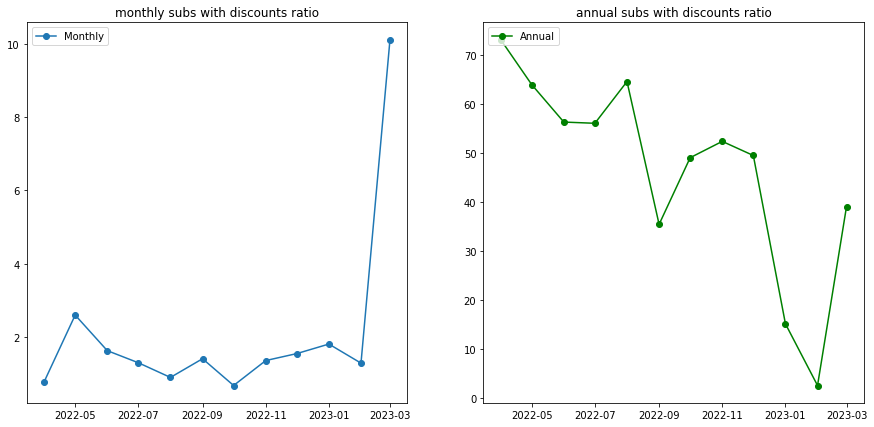

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

plt.subplot(1, 2, 1)
x1 = discounts_sum_monthly['transaction_month']
y1 = discounts_sum_monthly['ratio']
plt.title('monthly subs with discounts ratio')
plt.plot(x1, y1, marker='o', label = 'Monthly')
plt.legend(loc = 'upper left')

plt.subplot(1, 2, 2)
x2 = discounts_sum_annual['transaction_month']
y2 = discounts_sum_annual['ratio']
plt.title('annual subs with discounts ratio')
plt.plot(x2, y2, marker='o', label = 'Annual', color = 'green')
plt.legend(loc = 'upper left')

plt.show()

**Q5: Are there users who switched from one subscription to another? monthly to annual, annual to monthly. After how many months?**

In [39]:
# build a table with users subscriptions
change_sub = df.pivot_table(index = 'user_id', columns = 'plan_duration', values = 'plan_id', aggfunc = 'nunique').reset_index().fillna(0)
change_sub['total'] = change_sub['Annual'] + change_sub['Monthly']
change_sub.head()

plan_duration,user_id,Annual,Monthly,total
0,++jokcWsOw,0.0,1.0,1.0
1,+0l7207r+v,0.0,1.0,1.0
2,+2hatVdqL2,0.0,1.0,1.0
3,+31qk9llgb,0.0,1.0,1.0
4,+3SY+ycrLR,0.0,1.0,1.0


In [40]:
# select users who have over 1 subscription
users_who_changed_sub = list(change_sub.query('total > 1')['user_id'])
len(users_who_changed_sub)

107

In [41]:
# filter initial table and add direction of subscription change

df_changed = df[df['user_id'].isin(users_who_changed_sub)]

df_changed_pivot = (df_changed
                    .pivot_table(index = 'user_id', 
                                 columns = 'plan_duration', 
                                 values = 'transaction_month', 
                                 aggfunc = 'max')
                   ).reset_index()

df_changed_pivot = df_changed_pivot.rename(columns = {"Annual":"max_annual_date", "Monthly":"max_monthly_date"})
df_changed_pivot.loc[df_changed_pivot['max_annual_date'] > df_changed_pivot['max_monthly_date'], 'change_direction'] = 'from monthly to annual'
df_changed_pivot.loc[df_changed_pivot['max_monthly_date'] > df_changed_pivot['max_annual_date'], 'change_direction'] = 'from annual to monthly'
df_changed_pivot.head()

plan_duration,user_id,max_annual_date,max_monthly_date,change_direction
0,0UlbpyWJzm,2022-12-01,2022-11-01,from monthly to annual
1,0hOX3dcPuv,2023-03-01,2022-08-01,from monthly to annual
2,1U2sCTwHHp,2023-02-01,2023-01-01,from monthly to annual
3,2Aa1k4IOhn,2022-11-01,2022-10-01,from monthly to annual
4,2KSraiJT3e,2022-12-01,2022-11-01,from monthly to annual


In [42]:
df_changed_pivot['change_direction'].value_counts().reset_index()

,index,change_direction
0,from monthly to annual,107


In [43]:
df_changed.groupby('user_id').invoice_id.count().mean()

6.168224299065421

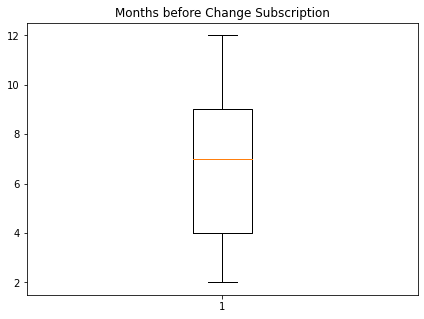

In [44]:
ch = df_changed.groupby('user_id').invoice_id.count().sort_values()

plt.figure(figsize=(7,5))
plt.boxplot(ch)
plt.title('Months before Change Subscription')
plt.show()

**Q6: What are the applicable fees?**

In [45]:
df[df['fees_charged'] != 0].shape

(14483, 11)

In [46]:
# all fee values
fees_df = df.groupby(['plan_duration', 'fees_charged']).invoice_id.count().reset_index()
fees_df.columns = ['plan_duration','fees_charged', 'invoice_amount']
fees_df.sort_values(by = ['plan_duration', 'invoice_amount'], ascending = [True, False])

,plan_duration,fees_charged,invoice_amount
9,Annual,14.28,240
14,Annual,17.03,133
22,Annual,25.71,79
5,Annual,12.04,63
6,Annual,12.28,56
20,Annual,21.59,54
11,Annual,14.34,50
0,Annual,0.00,40
8,Annual,14.02,35
19,Annual,20.90,29


**1 main outburst was found: zero fees**

In [47]:
not_charged_fees = fees_df[fees_df['fees_charged'] == 0]
not_charged_fees

,plan_duration,fees_charged,invoice_amount
0,Annual,0.0,40
24,Monthly,0.0,1478


In [48]:
annual_avg_fee = df[(df['plan_duration'] == 'Annual') & (df['fees_charged'] != 0)].fees_charged.median()
annual_avg_fee

14.28

In [49]:
monthly_avg_fee = df[(df['plan_duration'] == 'Monthly') & (df['fees_charged'] > 0)].fees_charged.median()
monthly_avg_fee

1.97

In [50]:
not_charged_fees['avg_fee'] = annual_avg_fee, monthly_avg_fee
not_charged_fees['missed_revenue'] = not_charged_fees['invoice_amount'] * not_charged_fees['avg_fee']
not_charged_fees

/var/folders/1w/fxwbqyv52h5bq4v1v80dmd4w0000gn/T/ipykernel_50821/1482014057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_charged_fees['avg_fee'] = annual_avg_fee, monthly_avg_fee
/var/folders/1w/fxwbqyv52h5bq4v1v80dmd4w0000gn/T/ipykernel_50821/1482014057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_charged_fees['missed_revenue'] = not_charged_fees['invoice_amount'] * not_charged_fees['avg_fee']


,plan_duration,fees_charged,invoice_amount,avg_fee,missed_revenue
0,Annual,0.0,40,14.28,571.20
24,Monthly,0.0,1478,1.97,2911.66


In [51]:
round(not_charged_fees['missed_revenue'].sum(),2)

3482.86

### Stage 3 Summary:

1. The client offers both monthly and annual subscriptions, with prices of 30 and 275, respectively. The annual subscription is equivalent to nine monthly subscriptions. 

2. The distribution of subscriptions shows a steady increase from October to January.

3. The total revenue generated from subscriptions is 625,539.69, with 67.5% coming from monthly subscriptions and 32.5% coming from annual subscriptions. The increase in subscriptions from October to January is attributed to seasonality, possibly in preparation for the New Year.

4. Discounts are applied to every third annual subscription sold, it is equal to 9.6% of annual revenue. Monthly discounted subscription are less than 1% of monthly revenue. There was an increase in purchases with discounts from October to January, possibly due to seasonal promotions. The most popular discount for annual subscriptions is 68.75, and for monthly subscriptions, it is 7.5. The percentage of annual subscriptions sold with discounts decreased over time, while monthly subscriptions with discounts remained steady, except for a spike in the last month of the observed period.

5. Users who changed subscriptions all switched from monthly to annual, with an average time frame of six months. This information can be used to determine the best time to offer subscription upgrades.

6. Fees vary widely for both types of subscriptions. A detailed analysis of price lists and third-party vendors is needed to separate Uscreen fees from non-Uscreen fees. There are some purchases made without charging fees, which could potentially lead to missed revenue. This is a matter that should be addressed by the product and development teams.

# 4. Calculation Metrics 

## 4.1. Retention Rate 

- Note: We take only monthly subscriptions cause there are no users with more than 1 annual subscription

In [52]:
df_monthly_subs = df[df['plan_duration'] == 'Monthly']

In [53]:
# find 1st purchase month and add it to the dataframe
first_activity_date = df_monthly_subs.groupby('user_id')['transaction_date'].min()
first_activity_date.name = 'first_activity_date'

In [54]:
visits = df_monthly_subs.join(first_activity_date, on = 'user_id')
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month'] = visits['transaction_date'].astype('datetime64[M]')

In [55]:
visits.tail()

,invoice_id,user_id,plan_id,plan_duration,transaction_date,subscription_price,discount_applied,fees_charged,amount_paid,transaction_month,discount_bigger_zero,first_activity_date,first_activity_month,activity_month
16002,qdHKVKAOhF,VSq893sNRI,3ZksraziGv,Monthly,2023-03-31,30.0,0.0,1.67,28.33,2023-03-01,0,2022-08-31,2022-08-01,2023-03-01
16003,hLw6HBb9m+,uw2jc4WWsE,3ZksraziGv,Monthly,2023-03-31,30.0,0.0,1.67,28.33,2023-03-01,0,2022-04-30,2022-04-01,2023-03-01
16004,dKhjtWK32q,EVWM9/6DCR,3ZksraziGv,Monthly,2023-03-31,30.0,0.0,1.67,28.33,2023-03-01,0,2023-01-31,2023-01-01,2023-03-01
16005,xtkGmu68Kx,mqoV9w5vMG,3ZksraziGv,Monthly,2023-03-31,30.0,10.0,1.58,18.42,2023-03-01,1,2022-05-25,2022-05-01,2023-03-01
16006,XNqOqjZqJa,9dlcryrdwv,3ZksraziGv,Monthly,2023-03-31,30.0,10.0,1.58,18.42,2023-03-01,1,2023-03-31,2023-03-01,2023-03-01


In [56]:
# Add cohort number
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = round(visits['cohort_lifetime']).astype(int)
visits.head()

,invoice_id,user_id,plan_id,plan_duration,transaction_date,subscription_price,discount_applied,fees_charged,amount_paid,transaction_month,discount_bigger_zero,first_activity_date,first_activity_month,activity_month,cohort_lifetime
0,ALNtNdnZ5g,jpvAY4jgqX,3ZksraziGv,Monthly,2022-04-01,30.0,0.0,1.67,28.33,2022-04-01,0,2022-04-01,2022-04-01,2022-04-01,0
1,UB/p3I3soC,7lnc9S0e+k,3ZksraziGv,Monthly,2022-04-01,30.0,0.0,1.97,28.03,2022-04-01,0,2022-04-01,2022-04-01,2022-04-01,0
2,JPqaABdS9/,rSRvTF4HKP,3ZksraziGv,Monthly,2022-04-01,30.0,0.0,1.67,28.33,2022-04-01,0,2022-04-01,2022-04-01,2022-04-01,0
3,qFP1t+jHi2,2P8ziCzzMW,3ZksraziGv,Monthly,2022-04-01,30.0,0.0,1.67,28.33,2022-04-01,0,2022-04-01,2022-04-01,2022-04-01,0
4,/RBlpp5X7q,i677ChXxOx,3ZksraziGv,Monthly,2022-04-01,30.0,0.0,1.67,28.33,2022-04-01,0,2022-04-01,2022-04-01,2022-04-01,0


In [57]:
# Calculate amount of unique users for cohorts
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts = cohorts.rename(columns = {"user_id":"cnt_users"})
cohorts.head()

,first_activity_month,cohort_lifetime,cnt_users
0,2022-04-01,0,1274
1,2022-04-01,1,1105
2,2022-04-01,2,1019
3,2022-04-01,3,961
4,2022-04-01,4,900


In [58]:
# Calculate the initial number of unique users by cohorts
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','cnt_users']].reset_index(drop = True)
initial_users_count = initial_users_count.rename(columns={'cnt_users':'cohort_users'})
initial_users_count.head()

,first_activity_month,cohort_users
0,2022-04-01,1274
1,2022-05-01,126
2,2022-06-01,118
3,2022-07-01,99
4,2022-08-01,100


In [59]:
# Join table and Calculate Rention Rate 
cohorts = cohorts.merge(initial_users_count, on = 'first_activity_month')
cohorts['retention'] = cohorts['cnt_users'] / cohorts['cohort_users']
cohorts.head()

,first_activity_month,cohort_lifetime,cnt_users,cohort_users,retention
0,2022-04-01,0,1274,1274,1.000000
1,2022-04-01,1,1105,1274,0.867347
2,2022-04-01,2,1019,1274,0.799843
3,2022-04-01,3,961,1274,0.754317
4,2022-04-01,4,900,1274,0.706436


In [60]:
# create a pivot table on the Retention Rate in the context of cohorts and periods
retention_pivot = cohorts.pivot_table(index='first_activity_month',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum')
retention_pivot.round(2).fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2022-04-01,1.0,0.87,0.8,0.75,0.71,0.67,0.63,0.6,0.56,0.53,0.49,0.51
2022-05-01,1.0,0.72,0.64,0.52,0.44,0.34,0.3,0.21,0.24,0.23,0.25,
2022-06-01,1.0,0.77,0.61,0.57,0.47,0.44,0.4,0.36,0.32,0.36,,
2022-07-01,1.0,0.73,0.6,0.53,0.4,0.32,0.31,0.24,0.23,,,
2022-08-01,1.0,0.73,0.58,0.46,0.39,0.36,0.33,0.33,,,,
2022-09-01,1.0,0.7,0.55,0.42,0.36,0.33,0.29,,,,,
2022-10-01,1.0,0.64,0.54,0.46,0.34,0.32,,,,,,
2022-11-01,1.0,0.64,0.45,0.35,0.33,,,,,,,
2022-12-01,1.0,0.72,0.54,0.5,,,,,,,,


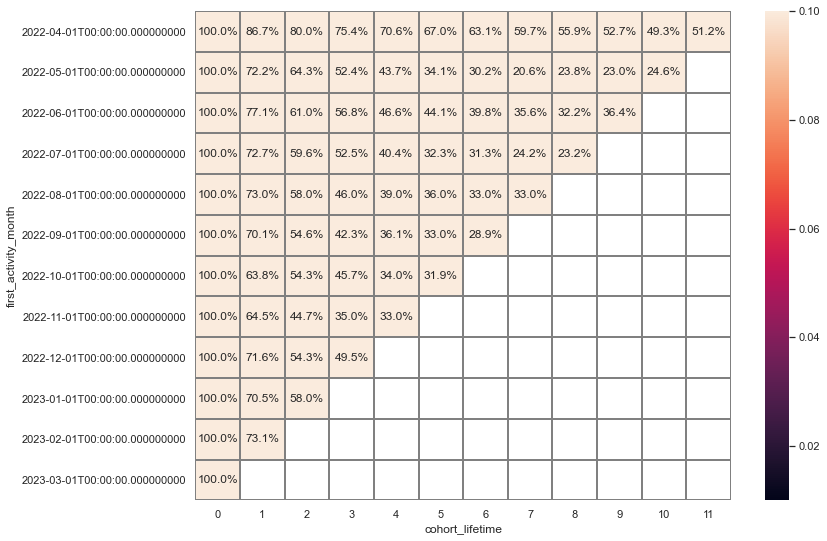

In [61]:
sns.set(style='white')
plt.figure(figsize=(12, 9))
sns.heatmap(retention_pivot, 
            annot=True, 
            fmt='.1%', 
            linewidths=1, 
            linecolor='gray',
           vmax = .1,
           vmin = .01)
plt.show()

In [62]:
# calculate mean RR by ages of cohorts
mean_rr_by_cohorts = retention_pivot.mean().round(2).reset_index()
mean_rr_by_cohorts.columns = ['age', 'mean_rr']
mean_rr_by_cohorts

,age,mean_rr
0,0,1.00
1,1,0.72
2,2,0.59
3,3,0.51
4,4,0.43
5,5,0.40
6,6,0.38
7,7,0.35
8,8,0.34
9,9,0.37


In [63]:
# calculate mean RR for all ages
mean_rr_by_cohorts['mean_rr'].mean()

0.4975

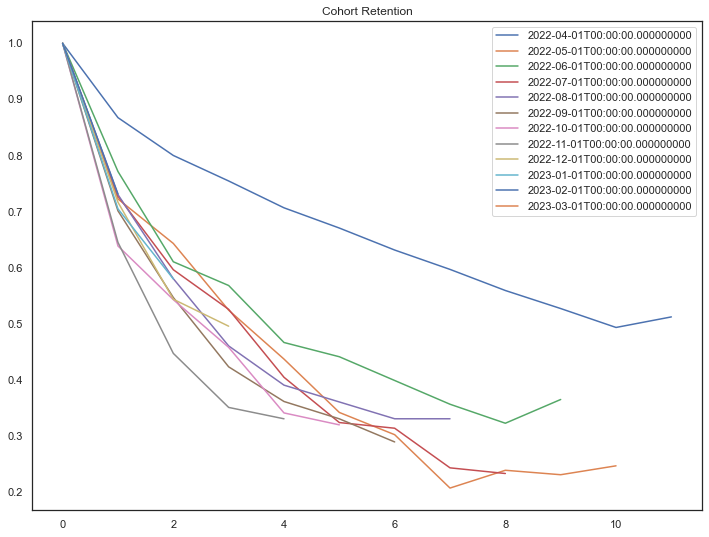

In [64]:
# retention curves 
plt.figure(figsize=(12, 9))
plt.title('Cohort Retention')
for i in cohorts.first_activity_month.unique():
    x = cohorts[cohorts['first_activity_month'] == i]['cohort_lifetime']
    y = cohorts[cohorts['first_activity_month'] == i]['retention']
    plt.plot(x,y, label = i)
    plt.legend()

## 4.2. LTV


Notes:
- there are several approaches how to calculate LTV based on. We will calculate simple and more complex one
- We take only monthly subscriptions cause there are no users with more than 1 annual subscription

**simple calculation**

In [65]:
avg_receipt = round(df_monthly_subs['amount_paid'].mean(),2)
avg_receipt

27.9

In [66]:
avg_amount_purchases = round(df_monthly_subs.groupby('user_id')['invoice_id'].count().mean(),2)
avg_amount_purchases

5.31

In [67]:
ltv_simple = round(avg_receipt * avg_amount_purchases,2)
ltv_simple

148.15

**cohort calculation**

In [68]:
# find 1st purchase month and add it to the dataframe
first_activity_date = df_monthly_subs.groupby('user_id')['transaction_date'].min()
first_activity_date.name = 'first_activity_date'

In [69]:
df_monthly_subs_upd = df_monthly_subs.join(first_activity_date, on = 'user_id')
df_monthly_subs_upd['first_activity_month'] = df_monthly_subs_upd['first_activity_date'].astype('datetime64[M]')
df_monthly_subs_upd['activity_month'] = df_monthly_subs_upd['transaction_date'].astype('datetime64[M]')

df_monthly_subs_upd = df_monthly_subs_upd.drop(['transaction_month'], axis=1)
df_monthly_subs_upd.head()

,invoice_id,user_id,plan_id,plan_duration,transaction_date,subscription_price,discount_applied,fees_charged,amount_paid,discount_bigger_zero,first_activity_date,first_activity_month,activity_month
0,ALNtNdnZ5g,jpvAY4jgqX,3ZksraziGv,Monthly,2022-04-01,30.0,0.0,1.67,28.33,0,2022-04-01,2022-04-01,2022-04-01
1,UB/p3I3soC,7lnc9S0e+k,3ZksraziGv,Monthly,2022-04-01,30.0,0.0,1.97,28.03,0,2022-04-01,2022-04-01,2022-04-01
2,JPqaABdS9/,rSRvTF4HKP,3ZksraziGv,Monthly,2022-04-01,30.0,0.0,1.67,28.33,0,2022-04-01,2022-04-01,2022-04-01
3,qFP1t+jHi2,2P8ziCzzMW,3ZksraziGv,Monthly,2022-04-01,30.0,0.0,1.67,28.33,0,2022-04-01,2022-04-01,2022-04-01
4,/RBlpp5X7q,i677ChXxOx,3ZksraziGv,Monthly,2022-04-01,30.0,0.0,1.67,28.33,0,2022-04-01,2022-04-01,2022-04-01


In [70]:
# Calculate the number of unique users by cohorts
cohort_sizes = df_monthly_subs_upd.groupby('first_activity_month').agg({'user_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_activity_month', 'n_buyers']
cohort_sizes

,first_activity_month,n_buyers
0,2022-04-01,1274
1,2022-05-01,126
2,2022-06-01,118
3,2022-07-01,99
4,2022-08-01,100
5,2022-09-01,97
6,2022-10-01,94
7,2022-11-01,197
8,2022-12-01,208
9,2023-01-01,176


In [71]:
# Calculate revenue by cohort in the context of the month of purchase and the first month of purchase
cohorts = df_monthly_subs_upd.groupby(['first_activity_month', 'activity_month']).agg({'amount_paid': 'sum'}).reset_index()
cohorts.head()

,first_activity_month,activity_month,amount_paid
0,2022-04-01,2022-04-01,35634.02
1,2022-04-01,2022-05-01,30845.88
2,2022-04-01,2022-06-01,28502.44
3,2022-04-01,2022-07-01,26881.45
4,2022-04-01,2022-08-01,25501.69


In [72]:
# join 2 previous tables
report = pd.merge(cohort_sizes, cohorts, on = 'first_activity_month')
report['ltv'] = report['amount_paid'] / report['n_buyers']

In [73]:
# calculate age of the cohorts and LTV
report['age'] = ((report['activity_month'] - report['first_activity_month']) / np.timedelta64(1, 'M'))
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['amount_paid'] / report['n_buyers']
report.head()

,first_activity_month,n_buyers,activity_month,amount_paid,ltv,age
0,2022-04-01,1274,2022-04-01,35634.02,27.970188,0
1,2022-04-01,1274,2022-05-01,30845.88,24.211837,1
2,2022-04-01,1274,2022-06-01,28502.44,22.372402,2
3,2022-04-01,1274,2022-07-01,26881.45,21.100039,3
4,2022-04-01,1274,2022-08-01,25501.69,20.017025,4


In [74]:
# Build pivot table LTV
output = report.pivot_table(index = 'first_activity_month',
                               columns = 'age',
                               values = 'ltv',
                               aggfunc = 'mean')
output = round(output,2)

In [75]:
# Build pivot table with cumulative LTV
output_cum = output.cumsum(axis = 1)
output_cum.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2022-04-01,27.97,52.18,74.55,95.65,115.67,134.41,152.16,168.91,184.64,199.93,213.74,228.03
2022-05-01,26.26,46.22,64.32,78.98,91.17,100.6,108.97,114.7,121.27,127.62,134.17,
2022-06-01,27.32,49.07,66.33,82.46,95.75,108.23,119.56,129.69,138.89,148.88,,
2022-07-01,28.37,48.55,65.34,80.15,91.29,100.38,109.16,116.02,122.26,,,
2022-08-01,28.43,49.0,66.71,79.75,91.26,101.28,110.69,120.0,,,,
2022-09-01,28.16,47.81,63.16,75.03,85.23,94.57,102.69,,,,,
2022-10-01,28.40,46.42,61.58,74.5,84.15,93.33,,,,,,
2022-11-01,27.84,45.89,58.45,68.27,77.37,,,,,,,
2022-12-01,27.96,47.74,62.94,76.47,,,,,,,,


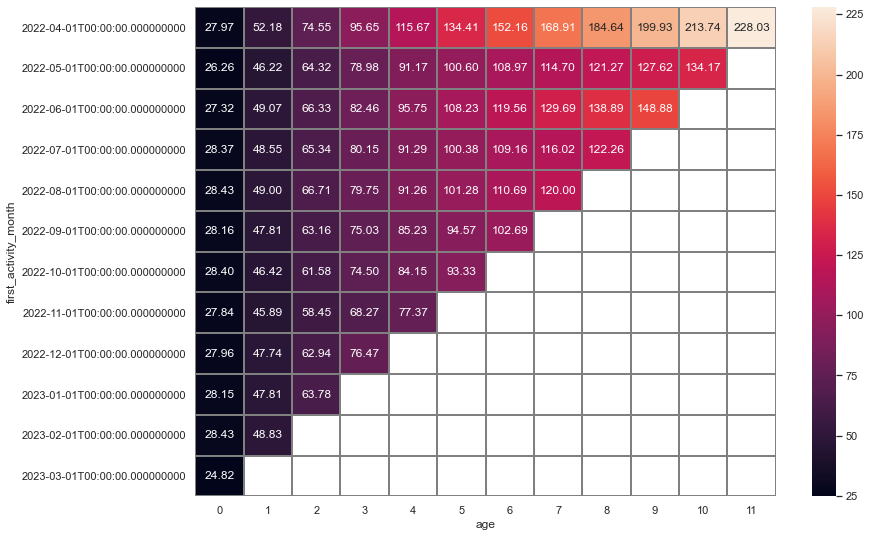

In [76]:
# Build heatmap with cumulative LTV
plt.figure(figsize = (13,9))
sns.heatmap(output_cum,
           annot = True,
           fmt = '.2f',
           linewidth = 1,
           linecolor = 'grey'
           )

plt.show()

In [77]:
# calculate mean LTV by ages of cohorts
mean_ltv_by_cohorts = output.cumsum(axis=1).mean().round(2).reset_index()
mean_ltv_by_cohorts.columns = ['age', 'mean_LTV']
mean_ltv_by_cohorts

,age,mean_LTV
0,0,27.68
1,1,48.14
2,2,64.72
3,3,79.03
4,4,91.49
5,5,104.69
6,6,117.20
7,7,129.86
8,8,141.76
9,9,158.81


In [78]:
# calculate mean LTV for all ages
round(mean_ltv_by_cohorts['mean_LTV'].mean(),2)

113.78

### Stage 4 Summary:
We have calculated metrics Retention and LTV:

1. The average retention rate (RR) across all cohorts for the observed period is 0.49, indicating a high retention rate.
2. However, retention starts to decrease as the cohort age increases, with the first two months being the most critical for retaining new users. During this period, almost 50% of users churn.

There are several approaches to calculate LTV for the company, ranging from optimistic to conservative and complex. In this case, we have used two popular approaches.
1. LTV increases steadily with the age of cohorts.
2. Using the basic approach (average invoices multiplied by average invoice sum), the user brings in 148 dollars for the observed period.
3. Using the cohort approach, the user brings in 113 dollars for the observed period.

# 5. Conclusions and Recomendations

We conducted an analysis of Uscreen client transactions, including subscription types, revenue, discounts, and commissions. Recommendations were developed after each analytical block.

In the first block, we prepared the data for analysis and identified duplicates, blank values, and negative fees. 
**To prevent their recurrence in the future, we recommend considering these cases.**

The second block analyzed revenue from subscriptions, discount usage, and user transitions between subscriptions. We found that over half of the revenue comes from monthly subscriptions, and a seasonal factor was observed from October to January. The share of discounted annual subscriptions decreased, while the share of monthly subscriptions sold at a discount fluctuated slightly. 
**We recommend examining transactions without commission, potentially leading to lost profits, and offer upgrades to loyal monthly subscribers between 1-6 months.**

In the third block, we calculated Retention Rate and LTV indicators. The Retention Rate was acceptable at 0.49, and the LTV was conservatively calculated at 113 dollars per user. 
**We recommend focusing on retaining new monthly subscribers during the first two months and using LTV to understand marketing spending budgets.**

### References:

- [Why cohort analysis beats all other approaches to calculating LTV](https://www.lifetimely.io/blog-posts/why-cohort-analysis-beats-all-other-approaches-to-calculating-ltv)
- [How many subscribers should you expect after one year?](https://www.revenuecat.com/blog/growth/one-year-retention-rates-insights/#:~:text=A%20retention%20rate%20is%20the,look%20like%20after%20one%20year.)
- [Correlation vs Causation: Understand the Difference for Your Product](https://amplitude.com/blog/causation-correlation)